<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_review.csv to hotel_review.csv


In [3]:
import io
review_df = pd.read_csv(io.BytesIO(uploaded['hotel_review.csv']))

In [30]:
review_df.head()


,Hotel_id,Hotel,Review_id,Users,Reviews,Rating
0,g297628-d503249,Royal Orchid Central,r758572477,Afreen A,It was very memorable stay at Royal orchid cen...,5
1,g297628-d503249,Royal Orchid Central,r758007447,Srikumar D,The Things happen with the time remember for l...,5
2,g297628-d503249,Royal Orchid Central,r757841035,devendranakka,My. stay was very comfortable e delightful.Thi...,5
3,g297628-d503249,Royal Orchid Central,r757272486,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4
4,g297628-d503249,Royal Orchid Central,r757252794,Jaya,Had a very comfortable stay. Services of staff...,5


In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
# Investigate Data
type(review_df)
review_df.size
review_df.shape
review_df.head()
review_df.tail()

pandas.core.frame.DataFrame

420

(70, 6)

,Hotel_id,Hotel,Review_id,Users,Reviews,Rating
0,g297628-d503249,Royal Orchid Central,r758572477,Afreen A,It was very memorable stay at Royal orchid cen...,5
1,g297628-d503249,Royal Orchid Central,r758007447,Srikumar D,The Things happen with the time remember for l...,5
2,g297628-d503249,Royal Orchid Central,r757841035,devendranakka,My. stay was very comfortable e delightful.Thi...,5
3,g297628-d503249,Royal Orchid Central,r757272486,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4
4,g297628-d503249,Royal Orchid Central,r757252794,Jaya,Had a very comfortable stay. Services of staff...,5


,Hotel_id,Hotel,Review_id,Users,Reviews,Rating
65,g297628-d1776454,Lemon Tree Hotel Whitefield,r752957113,Sonam K,I had stayed at lemon tree hotel and it was an...,5
66,g297628-d1776454,Lemon Tree Hotel Whitefield,r752732302,Ruchir B,I had been there for birthday celebration. San...,5
67,g297628-d1776454,Lemon Tree Hotel Whitefield,r752462986,Vinod,Excellent and comfy hotel close to my office. ...,5
68,g297628-d1776454,Lemon Tree Hotel Whitefield,r752248089,Abhai J,i had stayed at lemom tree hotel for 4 nights ...,5
69,g297628-d1776454,Lemon Tree Hotel Whitefield,r601964885,Sreekanth S,The service at lemon tree hotel was awesome a...,5


In [8]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Hotel_id   70 non-null     object
 1   Hotel      70 non-null     object
 2   Review_id  70 non-null     object
 3   Users      70 non-null     object
 4   Reviews    70 non-null     object
 5   Rating     70 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.4+ KB


In [10]:
review_df.shape


(70, 6)

In [34]:
review_df['Hotel'].unique()


array(['Royal Orchid Central',
       'ITC Windsor, Bengaluru - a Luxury Collection Hotel',
       'ITC Gardenia, Bengaluru - a Luxury Collection Hotel',
       'Welcomhotel Bengaluru', 'The Oberoi, Bengaluru', 'The Den',
       'Lemon Tree Hotel Whitefield'], dtype=object)

In [36]:
for index,text in enumerate(review_df['Reviews']):
  print('Review %d:\n'%(index+1),text)

Review 1:
 It was very memorable stay at Royal orchid central very friendly staff . The room is cleaned and hygiene they staff are taking care like home daily bassis twice they doing sanitize and the food is really delicious u can order as per your choice food packed very hygiene  manners  Specially the manager Fayaz is very coopertive  ever ready for help.   Thank you for great hospitality.
Review 2:
 The Things happen with the time remember for long time.The trip is like that.Good hygenic food with best service never before receiving opportunity. Fayaz sir is most cooperative person ever met. God bless The Hotel.
Review 3:
 My. stay was very comfortable e delightful.This ia first visit for business purposes. Good and comfortable stay . Hoping to come back soon. Service are great . This is centrally located. Easy to located the happening.
Review 4:
 I stayed here for 7 days & I was really happy with the service they provided.  It was worth it as the rates were low due to govt's interv

In [38]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
review_df['Reviews']=review_df['Reviews'].apply(lambda x:expand_contractions(x))

In [39]:
#Lowercase the Reviews

review_df['cleaned']=review_df['Reviews'].apply(lambda x: x.lower())


In [41]:
#Remove digits and words containing digits

review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [44]:
#Remove Punctuations

review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [45]:
# Removing extra spaces

review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [47]:
for index,text in enumerate(review_df['cleaned']):
  print('Review %d:\n'%(index+1),text)

Review 1:
 it was very memorable stay at royal orchid central very friendly staff the room is cleaned and hygiene they staff are taking care like home daily bassis twice they doing sanitize and the food is really delicious u can order as per your choice food packed very hygiene manners specially the manager fayaz is very coopertive ever ready for help thank you for great hospitality
Review 2:
 the things happen with the time remember for long timethe trip is like thatgood hygenic food with best service never before receiving opportunity fayaz sir is most cooperative person ever met god bless the hotel
Review 3:
 my stay was very comfortable e delightfulthis ia first visit for business purposes good and comfortable stay hoping to come back soon service are great this is centrally located easy to located the happening
Review 4:
 i stayed here for days i was really happy with the service they provided it was worth it as the rates were low due to govt is intervention i want to highlight a 

In [48]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
review_df['lemmatized']=review_df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [49]:
df_grouped=review_df[['Hotel','lemmatized']].groupby(by='Hotel').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
Hotel,
"ITC Gardenia, Bengaluru - a Luxury Collection Hotel",great experience itc look luxary stay visit pl...
"ITC Windsor, Bengaluru - a Luxury Collection Hotel",visit find excellent service cosistently raj p...
Lemon Tree Hotel Whitefield,hi team hotel chef prema decent guy hospitalit...
Royal Orchid Central,memorable stay royal orchid central friendly s...
The Den,stay den hotel bangalore day night strand indi...


In [55]:
# Creating Document Term Matrix

#data=cv.fit_transform(df_grouped['lemmatized'])
#df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#df_dtm.index=df_grouped.index
#df_dtm.head(3)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
data=vectorizer.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,abhinandan,able,absolutely,access,accommodate,accommodating,activity,actually,adil,advaith,advocate,afternoon,air,airport,allot,amazing,amazingly,ambience,ambient,amenity,amid,amit,anamika,anniversary,anoop,anushri,anushrii,anyways,appealing,appreciate,approximately,architecture,area,ariva,aroundwill,arrange,arrangement,arrive,artfully,artwork,...,walk,want,warm,warmly,warmth,watch,water,waterman,way,waybreakfast,wedding,week,welcom,welcome,welcoming,well,wellthank,western,white,whitefield,wide,wife,wifi,willing,window,windsor,wish,withstand,woman,wonderful,word,work,worker,workthank,worth,wow,wrongcould,year,yes,young
Hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"ITC Gardenia, Bengaluru - a Luxury Collection Hotel",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.057305,0.0,0.0,0.057305,0.0,0.0,0.061845,0.057305,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.057305,0.0,0.000000,0.0,0.000000,0.176504,0.057305,0.057305,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.030923,0.0,0.000000,0.0,0.047568,0.0,0.0,0.000000,0.0,0.030923,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.047568,0.000000,0.0,0.0,0.057305,0.040659,0.0,0.141203,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
"ITC Windsor, Bengaluru - a Luxury Collection Hotel",0.0,0.0,0.0,0.0,0.0,0.056247,0.056247,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.039909,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.056247,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.056247,...,0.0,0.034649,0.09338,0.0,0.056247,0.0,0.000000,0.0,0.034649,0.0,0.000000,0.0,0.0,0.039909,0.0,0.060704,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.224988,0.0,0.0,0.000000,0.039909,0.0,0.000000,0.0,0.0,0.0,0.0,0.056247,0.0,0.000000,0.0
Lemon Tree Hotel Whitefield,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.026896,0.000000,0.0,0.049843,0.035365,0.049843,0.0,0.049843,0.000000,0.049843,0.0,0.0,0.000000,0.0,0.041374,0.0,0.000000,0.030704,0.000000,0.000000,0.0,0.041374,0.0,0.0,0.000000,...,0.0,0.030704,0.00000,0.0,0.000000,0.0,0.026896,0.0,0.030704,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.049843,0.049843,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.041374,0.0


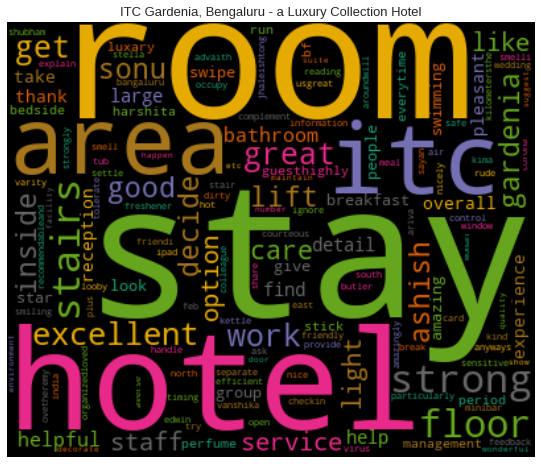

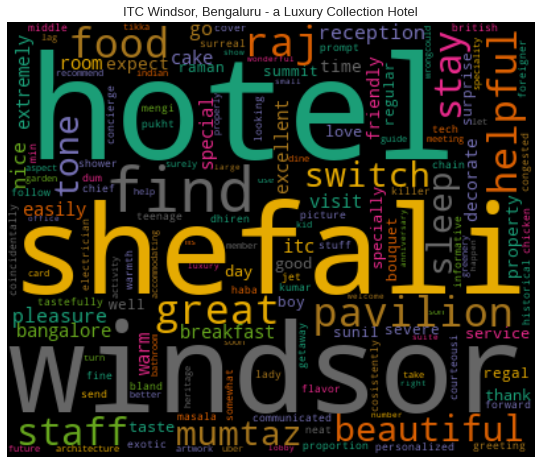

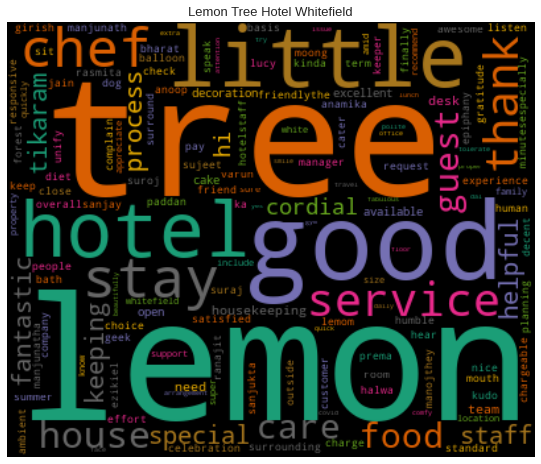

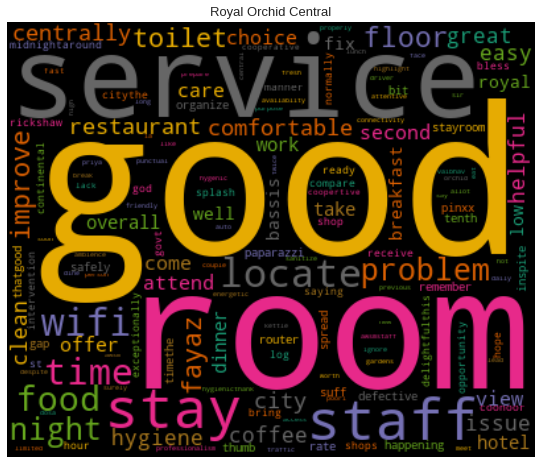

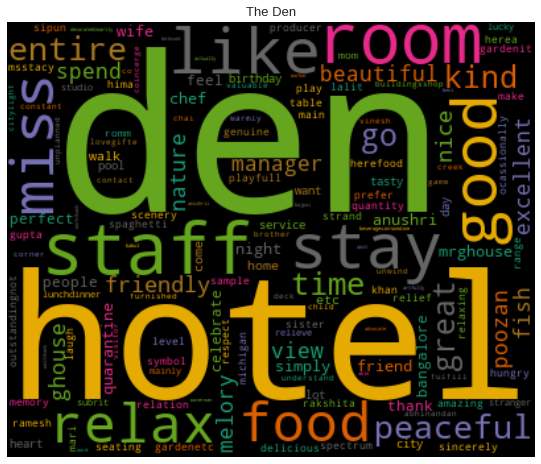

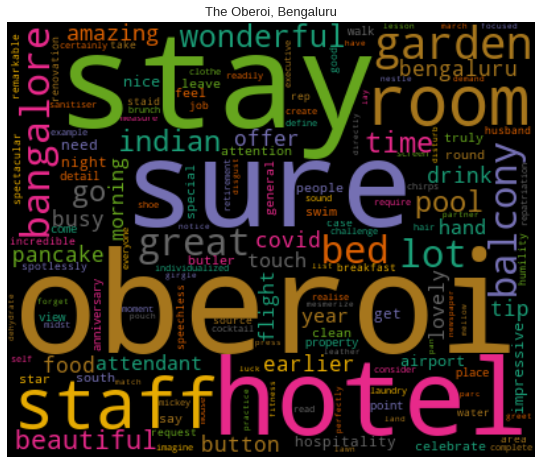

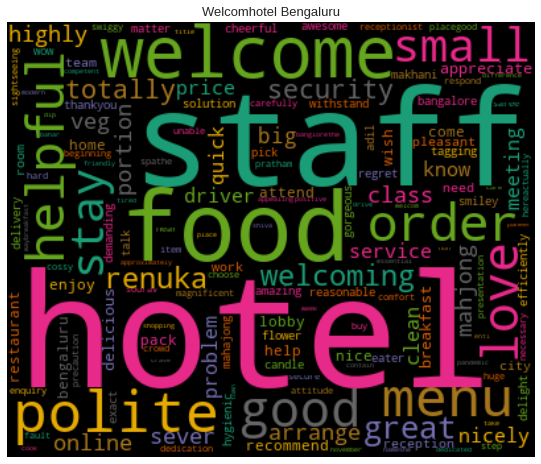

In [58]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,hotel in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[hotel].sort_values(ascending=False),hotel)

In [59]:
#Checking the polarity of the Reviews
from textblob import TextBlob
review_df['polarity']=review_df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [61]:
#Checking the highest polarity of reviews

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=False)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 It was a great experience in itc, if you are looking for a luxary stay you must visit this place, the service provided was excellent, we had booked a suite and the hospitality was amazing, varity of options in bf and meal, the taste was so good. Looking for many more pleasant stays,
Review 2:
 Sonu has taken a good care of me while I was working there. And I had a wonderful stay there . I was very happy with the staff for being there Everytime for us. Edwin and sonu were so amazing at their work. Ashish from reception was so good that he took care of all check-in happening .
Review 3:
 We had a very pleasant and memorable stay at the Windsor Suite.  We thank Mumtaz, Shefali  and Sunil Kumar for their excellent service. The food is very  delicious  both at the Dum Pukht and  at The Raj Pavilion. The whole team is very friendly and helpful.


In [62]:
#Checking the lowest polarity of reviews

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=True)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 On 23 Feb 2020, I have checked into the Hotel at around 7:30pm. A guy and women at reception was very rude and they just gave me swipe card and not even told me gave me information about my room like floor number and where is my room. I kept asking but they try to ignore. They have not shared details like breakfast area, timing etc. Anyways I found my room with help of people staying ovethere(My friend).I got a room at 21st floor. After getting settled down in room I have decided to go for the dinner with my colleague (He is staying in 18th floor) but lift was not working for me to go to 18th floor. So I have decided to take stairs. Once I got inside the stairs area which is just beside lift area, I got stuck into stairs area (Doors are not opening from inside the stairs area in
Review 2:
 Following few things which went wrong/could have been better  1. I had severe jet lag and wanted to sleep. I could not find switch off for 15 mins.  

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Hotels')

Text(0.5, 1.0, 'Polarity of Different Hotel Reviews')

Text(0.005, 0.029098274410774394, 'Royal Orchid Central')

Text(0.005, 1.0479325396825396, 'Lemon Tree Hotel Whitefield')

Text(0.005, 2.0509626773689273, 'Welcomhotel Bengaluru')

Text(0.005, 3.0695623777677348, 'The Oberoi, Bengaluru')

Text(0.005, 4.0905164399092975, 'ITC Windsor, Bengaluru - a Luxury Collection Hotel')

Text(0.005, 5.106490832696714, 'The Den')

Text(0.005, 6.119873015873016, 'ITC Gardenia, Bengaluru - a Luxury Collection Hotel')

Text(0.4300982744107744, 0.029098274410774394, '0.429')

Text(0.44893253968253966, 1.0479325396825396, '0.448')

Text(0.4519626773689274, 2.0509626773689273, '0.451')

Text(0.47056237776773485, 3.0695623777677348, '0.470')

Text(0.4915164399092971, 4.0905164399092975, '0.491')

Text(0.507490832696715, 5.106490832696714, '0.506')

Text(0.5208730158730159, 6.119873015873016, '0.520')

([], <a list of 0 Text major ticklabel objects>)

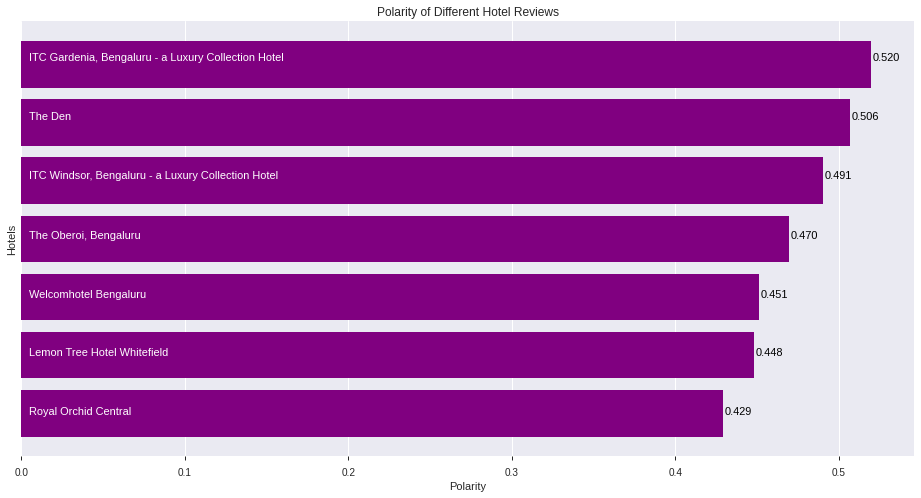

In [63]:
 #plot polarities of reviews for each hotels and their comparision
product_polarity_sorted=pd.DataFrame(review_df.groupby('Hotel')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Hotels')
plt.title('Polarity of Different Hotel Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [67]:
ratings_sum = pd.DataFrame(review_df.groupby(['Hotel_id'])['Rating'].sum()).rename(columns = {'Rating': 'ratings_sum'})
top10 = ratings_sum.sort_values('ratings_sum', ascending = False).head(10)
top10

,ratings_sum
Hotel_id,
g297628-d1776454,49
g297628-d301774,49
g297628-d6649653,49
g297628-d304212,48
g297628-d13200517,47
g297628-d1567342,44
g297628-d503249,41


In [69]:
top10_popular=top10.merge(review_df,left_index = True, right_on = 'Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel','ratings_sum']]

In [70]:
print ('Top 10 Popular Products by sum user ratings\n')
top10_popular

Top 10 Popular Products by sum user ratings



,Hotel_id,Hotel,ratings_sum
60,g297628-d1776454,Lemon Tree Hotel Whitefield,49
9,g297628-d301774,Royal Orchid Central,49
10,g297628-d301774,"ITC Windsor, Bengaluru - a Luxury Collection H...",49
30,g297628-d6649653,Welcomhotel Bengaluru,49
40,g297628-d304212,"The Oberoi, Bengaluru",48
50,g297628-d13200517,The Den,47
20,g297628-d1567342,"ITC Gardenia, Bengaluru - a Luxury Collection ...",44
0,g297628-d503249,Royal Orchid Central,41


In [71]:
ratingsd=review_df.pivot(index='Hotel_id',columns= 'Users',values='Rating').fillna(0)
ratingsd.head()

Users,157henk157,342hugop,403Singh_13,@RawatSS000,Aakarsh18Reddy,Abhai J,Abhinandan Bajpai,Abhinash,Abhishek,Afreen A,Ally,Alyssa M,Amit J,Amol Saindane,AnoopSaxena,Aravinda,Ashesha G Bhatta,BSR Chanukya,Balaji M,Bharat Jain,Chan P,Chandana,ClaireCahill,Devanand,Gangadhar,Garic B,Gopi krishna,Jaya,Jim Miles,Madan Mohan Kuruvadi,Manuel Nelson,Meghna G,Nelson,Niharika V,Odyssey553508,Patbee1,Rahul R,Rajiv Thapar,Rakshyatha,Road23537293598,Rohit Agrawal,Ruchir B,SChoudhury,SHRINIVAS POOJAR,Sandip Sarkar,Sanjay J,Sara jain,Sarvika Mehra Banerjee,Sonam K,Sourav,Sowmya,Sreekanth S,Srikumar D,Thibaut D,Tupu,Vara Reddy,Vinay S,Vinod,Vishal,Zach,alapatyshailaja,bhatiavishnu,devendranakka,dinesh k,hajira z,mohammedzubaird,mrinzzzzzzzz,nadiya k,raj7
Hotel_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
g297628-d13200517,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g297628-d1567342,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
g297628-d1776454,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g297628-d301774,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
g297628-d304212,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
ratingsd.shape


(7, 69)

In [73]:
from sklearn.model_selection import train_test_split
traind, testd = train_test_split(ratingsd, test_size=0.30,random_state=42)

In [76]:
train = traind.to_numpy()
test = testd.to_numpy()

In [77]:
sparsity = float(len(train.nonzero()[0]))
sparsity /= (train.shape[0] * train.shape[1])
sparsity *= 100
print ('Sparsity: {:5.2f}%'.format(sparsity))

Sparsity: 14.86%


In [78]:
def item_similarity(Rating, epsilon=1e-9):
    # epsilon -> for handling dived-by-zero errors
    sim = Rating.T.dot(Rating) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [79]:
item_sim = item_similarity(train)


In [80]:

def predict_item(ratings, similarity):
    return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [81]:
item_prediction = predict_item(train, item_sim)


In [82]:
item_prediction[:4, :4]


array([[2.27268154e-10, 1.99996458e-10, 1.99996458e-10, 1.81815255e-10],
       [2.27268154e-10, 4.79991500e+00, 4.79991500e+00, 1.81815255e-10],
       [4.45445581e+00, 2.19996104e-10, 2.19996104e-10, 4.45447374e+00],
       [2.27268154e-10, 1.99996458e-10, 1.99996458e-10, 1.81815255e-10]])

In [83]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [84]:
print ('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))


Item-based CF MSE: 21.44817375123949


In [85]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(traind) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pm=pd.DataFrame(cosine_similarity(r_mat_tr))
#pm.head()
ctrain = cosine_similarity(r_mat_tr)

[0.25448786 0.25448786 0.24604013 0.24498416]
1.0000000000000002


In [86]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(testd) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pmtt=pd.DataFrame(cosine_similarity(r_mat_tr))
#print (pmtt[:2])
#pmtt.head()
ctest = cosine_similarity(r_mat_tr)

[0.3585209  0.33762058 0.30385852]
0.9999999999999998


In [87]:
print (' CF MSE: ' + str(get_mse(ctrain, ctest)))


 CF MSE: 1.199553379351107e-31


In [88]:
review_df = review_df.sort_values(by='Rating')
review_df = review_df.reset_index(drop=True)
count_users = review_df.groupby("Users", as_index=False).count()

In [89]:
count = review_df.groupby("Hotel_id", as_index=False).mean()


In [90]:
items_df = count[['Hotel_id']]
items_df.head()
print(len(items_df))

,Hotel_id
0,g297628-d13200517
1,g297628-d1567342
2,g297628-d1776454
3,g297628-d301774
4,g297628-d304212


7


In [92]:
users_df = count_users[['Users']]
users_df.head()
print(len(users_df))

,Users
0,157henk157
1,342hugop
2,403Singh_13
3,@RawatSS000
4,Aakarsh18Reddy


69


In [93]:
users_list = users_df.values
len(users_list)

69

In [96]:
df_clean_matrix = review_df.pivot(index='Hotel_id', columns='Users', values='Rating').fillna(0)
df_clean_matrix = df_clean_matrix.T
R = (df_clean_matrix).to_numpy()
R

array([[0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5.],
       [0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5.],
       [0., 0., 0., 0., 0., 4., 0.],
       [5., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5.],
       [4., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
 

In [97]:
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.57142857, -0.57142857, -0.57142857,  3.42857143, -0.57142857,
        -0.57142857, -0.57142857],
       [-0.71428571, -0.71428571, -0.71428571, -0.71428571,  4.28571429,
        -0.71428571, -0.71428571],
       [-0.71428571, -0.71428571, -0.71428571, -0.71428571,  4.28571429,
        -0.71428571, -0.71428571],
       [-0.71428571, -0.71428571, -0.71428571,  4.28571429, -0.71428571,
        -0.71428571, -0.71428571],
       [-0.71428571,  4.28571429, -0.71428571, -0.71428571, -0.71428571,
        -0.71428571, -0.71428571],
       [-0.71428571, -0.71428571,  4.28571429, -0.71428571, -0.71428571,
        -0.71428571, -0.71428571],
       [ 4.28571429, -0.71428571, -0.71428571, -0.71428571, -0.71428571,
        -0.71428571, -0.71428571],
       [-0.71428571, -0.71428571, -0.71428571, -0.71428571, -0.71428571,
        -0.71428571,  4.28571429],
       [-0.71428571,  4.28571429, -0.71428571, -0.71428571, -0.71428571,
        -0.71428571, -0.71428571],
       [-0.71428571, -0.7142

In [98]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned)

In [99]:
sigma = np.diag(sigma)


In [100]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_clean_matrix.columns)
preds_df['Users'] = users_df
preds_df.set_index('Users', inplace=True)
preds_df.head()

Hotel_id,g297628-d13200517,g297628-d1567342,g297628-d1776454,g297628-d301774,g297628-d304212,g297628-d503249,g297628-d6649653
Users,,,,,,,
157henk157,-8.881784e-16,-2.220446e-16,-1.110223e-16,4.000000e+00,-2.220446e-16,-6.661338e-16,-1.110223e-15
342hugop,3.330669e-16,5.551115e-16,-1.554312e-15,4.440892e-16,5.000000e+00,3.330669e-16,-8.881784e-16
403Singh_13,3.330669e-16,5.551115e-16,-1.554312e-15,4.440892e-16,5.000000e+00,3.330669e-16,-8.881784e-16
@RawatSS000,-4.440892e-16,-2.220446e-16,-1.110223e-16,5.000000e+00,-1.110223e-16,-6.661338e-16,-1.221245e-15
Aakarsh18Reddy,1.110223e-16,5.000000e+00,-3.330669e-16,7.771561e-16,8.881784e-16,1.110223e-16,1.332268e-15


In [101]:
preds_df.shape


(69, 7)

In [113]:
def recommend_it(predictions_df, itm_df, original_ratings_df, num_recommendations=10,rUsers='157henk157'):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[rUsers].sort_values(ascending=False)
    
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.Users == rUsers]
    user_full = (user_data.merge(itm_df, how = 'left', left_on = 'Hotel_id', right_on = 'Hotel_id').
                     sort_values(['Rating'], ascending=False)
                 )

    print ('User {0} has already purchased {1} items.'.format(rUsers, user_full.shape[0]))
    print ('Recommending the highest {0} predicted  items not already purchased.'.format(num_recommendations))
    
    # Recommend the highest predicted rating items that the user hasn't bought yet.
    recommendations = (itm_df[~itm_df['Hotel_id'].isin(user_full['Hotel_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Hotel_id',
               right_on = 'Hotel_id').
         rename(columns = {rUsers: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    topk=recommendations.merge(original_ratings_df,left_index = True, right_on = 'Hotel_id',left_on='Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel']]

    return topk

In [114]:
recommend_it(preds_df, items_df, review_df, 5)


User 157henk157 has already purchased 1 items.
Recommending the highest 5 predicted  items not already purchased.


,Hotel_id,Hotel
13,g297628-d1776454,Lemon Tree Hotel Whitefield
0,g297628-d1567342,"ITC Gardenia, Bengaluru - a Luxury Collection ..."
9,g297628-d304212,"The Oberoi, Bengaluru"
10,g297628-d503249,Royal Orchid Central
3,g297628-d13200517,The Den
